In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Hyperparameters
batch_size = 100  # Batch size for training and testing

In [2]:
# Data Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# CIFAR-10 Dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# DataLoader for batching
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

Number of training samples: 50000
Number of testing samples: 10000


In [6]:
import torch.nn as nn

# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # Layer 1: 입력 크기 (100, 3, 32, 32) -> 출력 크기 (100, 32, 16, 16)
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # 입력 채널=3 (RGB), 출력 채널=32, 커널 크기=3x3
            nn.ReLU(),  # 활성화 함수 ReLU
            nn.MaxPool2d(kernel_size=2, stride=2)  # 최대 풀링: 크기 2x2, 스트라이드=2 (다운샘플링)
        )
        
        # Layer 2: 입력 크기 (100, 32, 16, 16) -> 출력 크기 (100, 64, 8, 8)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # 입력 채널=32, 출력 채널=64, 커널 크기=3x3
            nn.ReLU(),  # 활성화 함수 ReLU
            nn.MaxPool2d(kernel_size=2, stride=2)  # 최대 풀링: 크기 2x2, 스트라이드=2 (다운샘플링)
        )
        
        # Layer 3: 입력 크기 (100, 64, 8, 8) -> 출력 크기 (100, 128, 4, 4)
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # 입력 채널=64, 출력 채널=128, 커널 크기=3x3
            nn.ReLU(),  # 활성화 함수 ReLU
            nn.MaxPool2d(kernel_size=2, stride=2)  # 최대 풀링: 크기 2x2, 스트라이드=2 (다운샘플링)
        )
        
        # Fully Connected Layer: 입력 크기 (100, 128 * 4 * 4) -> 출력 크기 (100, 10)
        # CIFAR-10에는 10개의 클래스가 있음
        self.fc = nn.Linear(128 * 4 * 4, 10)  # 완전 연결층: 입력 뉴런=128*4*4, 출력 뉴런=10

    # 순전파 (Forward Propagation)
    def forward(self, x):
        out = self.layer1(x)  # Layer 1을 통과
        out = self.layer2(out)  # Layer 2를 통과
        out = self.layer3(out)  # Layer 3을 통과
        out = out.view(out.size(0), -1)  # 1차원으로 펼침 (Flatten)
        out = self.fc(out)  # Fully Connected Layer를 통과
        return out  # 최종 출력 반환

In [7]:
# 모델 생성
model = CNN()

# 모델 구조 출력
print(model)  # 모델의 각 레이어와 출력 크기를 확인

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)


In [8]:
import torch.optim as optim

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저, 학습률 0.001

# 장치 설정 (GPU 사용 가능 시 GPU로 이동)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # 모델을 GPU 또는 CPU로 이동

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

In [9]:
# 모델 학습
epochs = 10  # 학습 반복 횟수

for epoch in range(epochs):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0  # 손실 초기화

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # 데이터를 장치로 이동

        # 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 가중치 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

Epoch [1/10], Loss: 1.4485
Epoch [2/10], Loss: 1.0379
Epoch [3/10], Loss: 0.8571
Epoch [4/10], Loss: 0.7470
Epoch [5/10], Loss: 0.6652
Epoch [6/10], Loss: 0.5936
Epoch [7/10], Loss: 0.5375
Epoch [8/10], Loss: 0.4855
Epoch [9/10], Loss: 0.4297
Epoch [10/10], Loss: 0.3888


In [10]:
# 모델 평가
model.eval()  # 평가 모드로 설정
correct = 0
total = 0

with torch.no_grad():  # 평가 시에는 그래디언트 계산 비활성화
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # 순전파
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # 예측 값 가져오기
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 73.80%


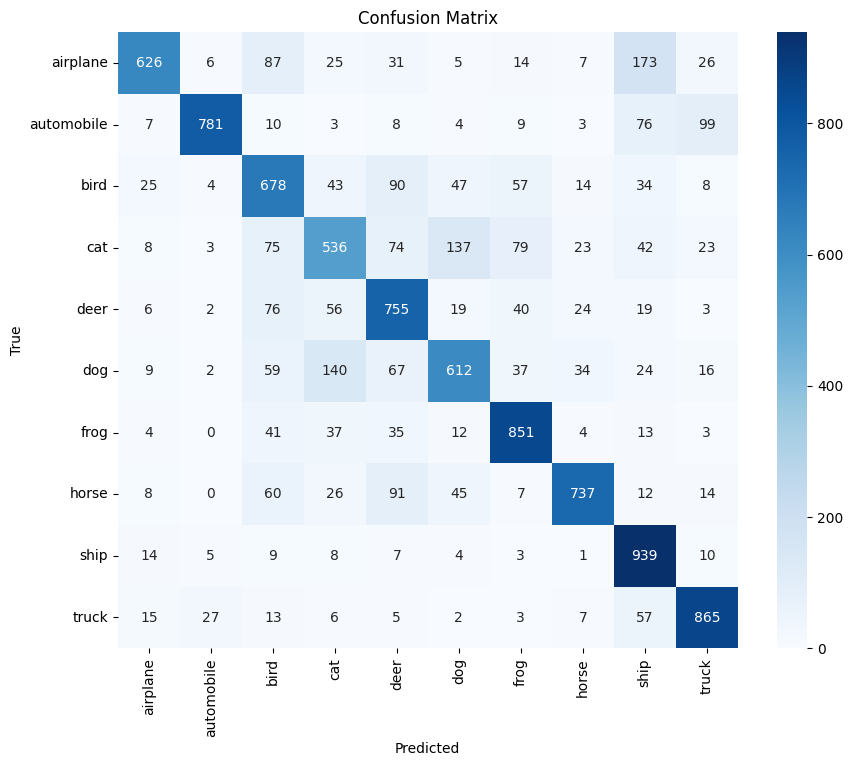

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 혼동 행렬 생성
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()